In [1]:
import pickle
import numpy as np
from gembed.multigraph import Multigraph

with open('results/cora_embeddings.pkl', 'rb') as inobj:
    embeddings = pickle.load(inobj)
with open('results/cora_graph.pkl', 'rb') as inobj:
    graph = pickle.load(inobj)

embeddings_dict = {t[0]:t[1] for t in embeddings }
embedding_nodes = [t[0] for t in embeddings]
embedding_vectors = [t[1] for t in embeddings]

In [2]:
graph.summary()

Undirected graph?: True
n nodes: 2708
n relation types: 1
n connections: 8021
5 most connected nodes: [(u'1358', 131), (u'1701', 58), (u'306', 58), (u'1986', 56), (u'1810', 39)]
5 least connected nodes (non-terminal): [(u'2572', 2), (u'2603', 2), (u'2626', 2), (u'2693', 2), (u'2661', 2)]
n terminal nodes: 23
5 most frequent relations: [(u'REA', 8021)]
5 least frequent relations: [(u'REA', 8021)]
equivalent nodes: [[u'1752', u'1753'], [u'2313', u'2314']]


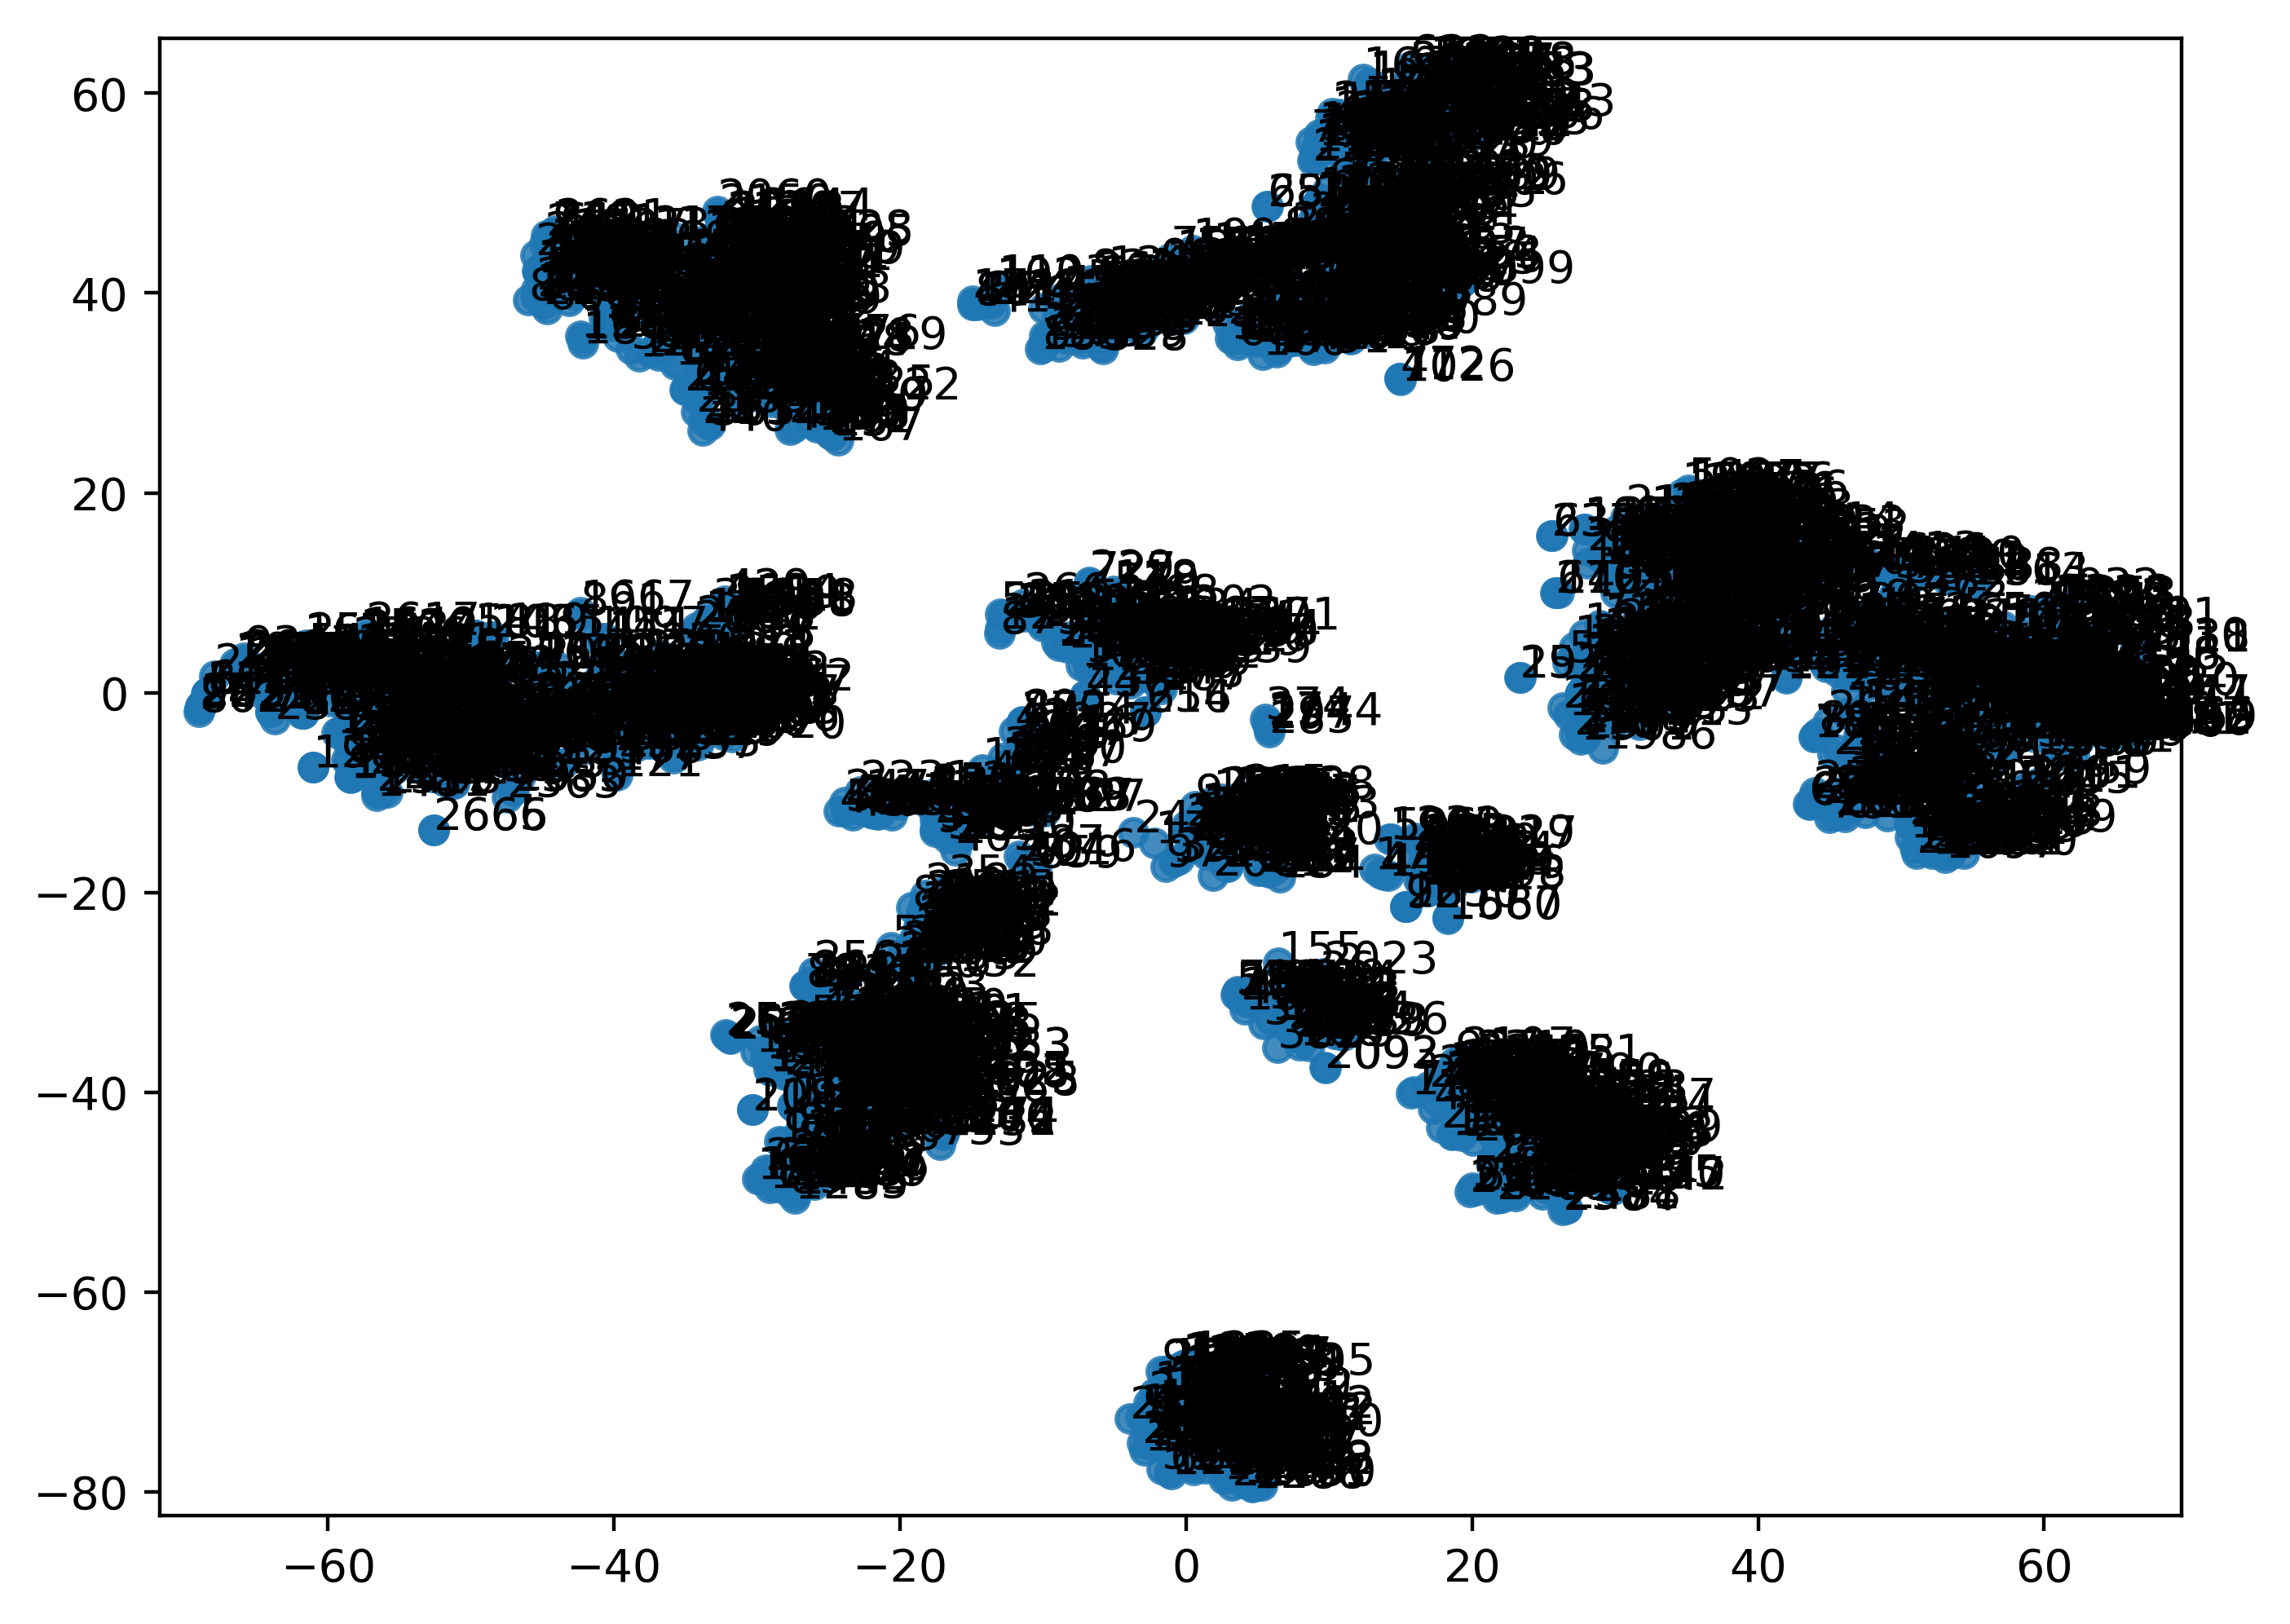

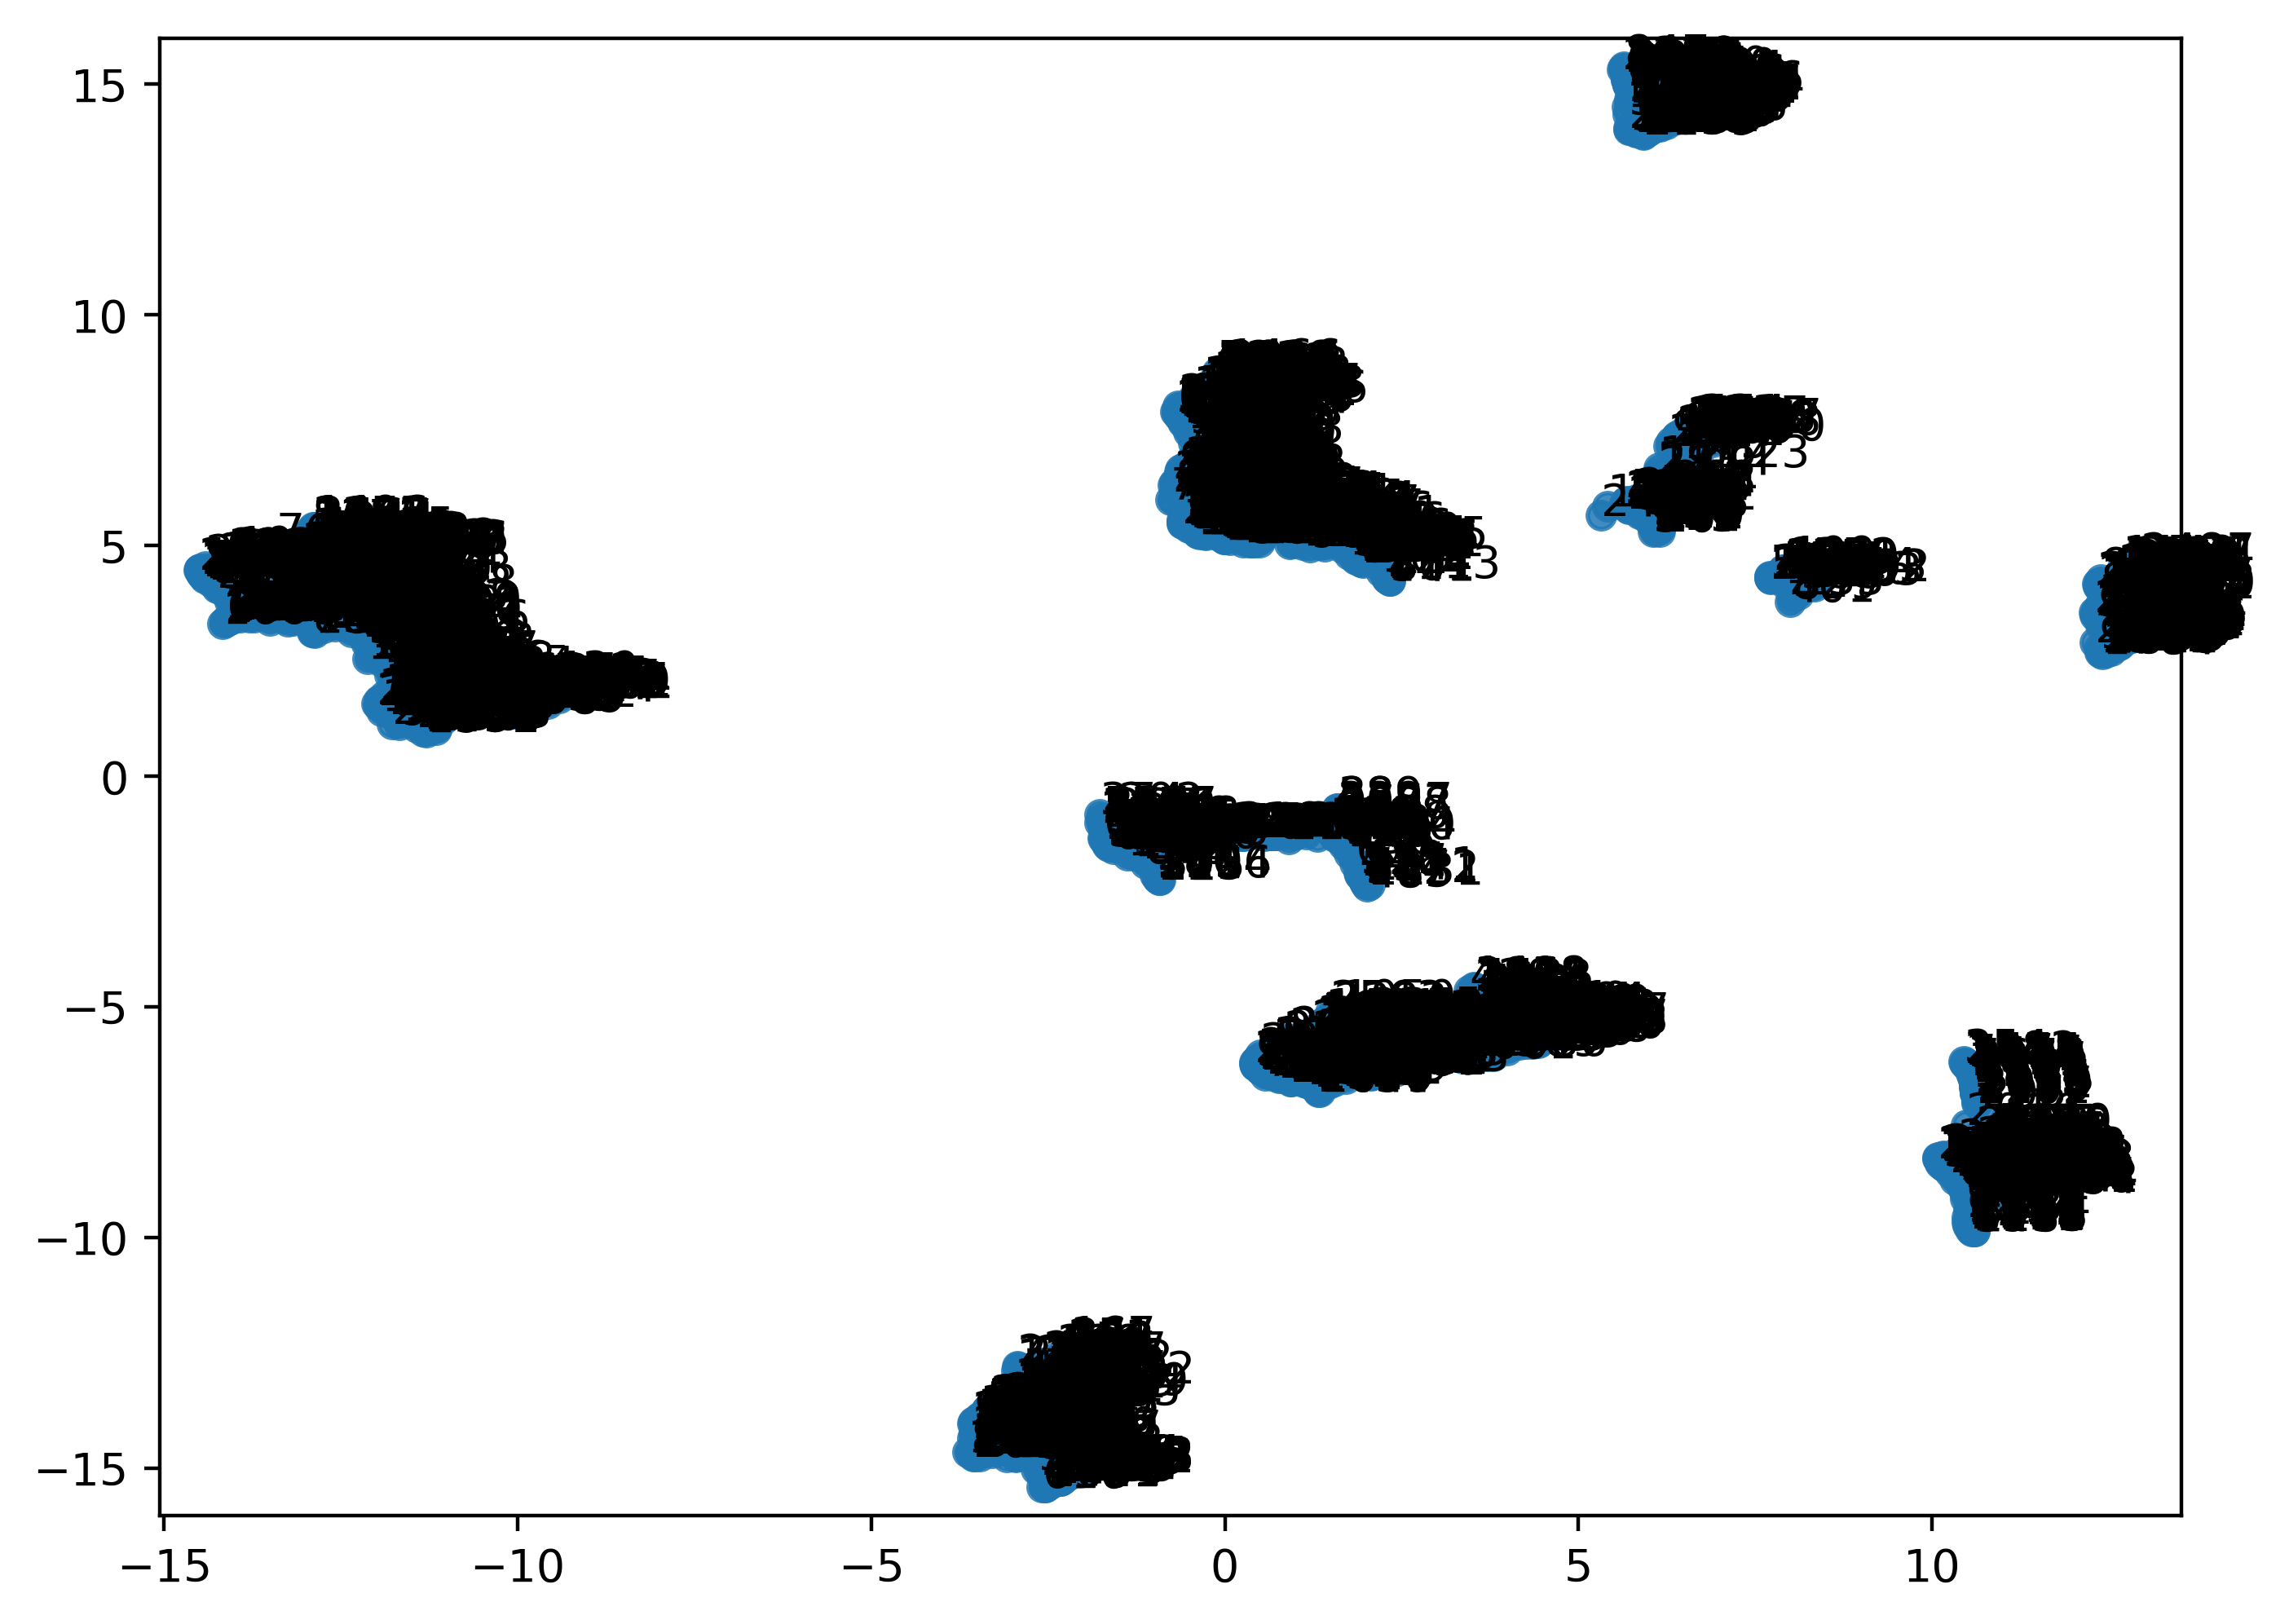

In [5]:
import gembed.plotting as plotting
%matplotlib inline

tnse_pts = plotting.tsne2D(embedding_vectors)
umap_pts = plotting.umap2D(embedding_vectors)

plotting.scatterplot2D(tnse_pts[:,0],tnse_pts[:,1],embedding_nodes)
plotting.scatterplot2D(umap_pts[:,0],umap_pts[:,1],embedding_nodes)


In [6]:
import unicodecsv as csv 

def get_category_tuple(filename, skip_first_line=False):
    source_names = []
    target_names = []
    with open(filename, 'r') as csvfile:
        graphreader = csv.reader(csvfile)
        i = 0
        for row in graphreader:
            if skip_first_line and i == 0:
                i += 1
                continue
            source_names.append(row[0])
            target_names.append(row[1])
    return zip(source_names, target_names)

def get_category_embeddings(category, embeddings_dict):
    # category is a list a of types (source node name, category label)
    category_embeddings = []
    category_labels = []
    for i in category:
        category_embeddings.append(embeddings_dict[i[0]])
        category_labels.append(i[1])
    return (category_embeddings, category_labels)

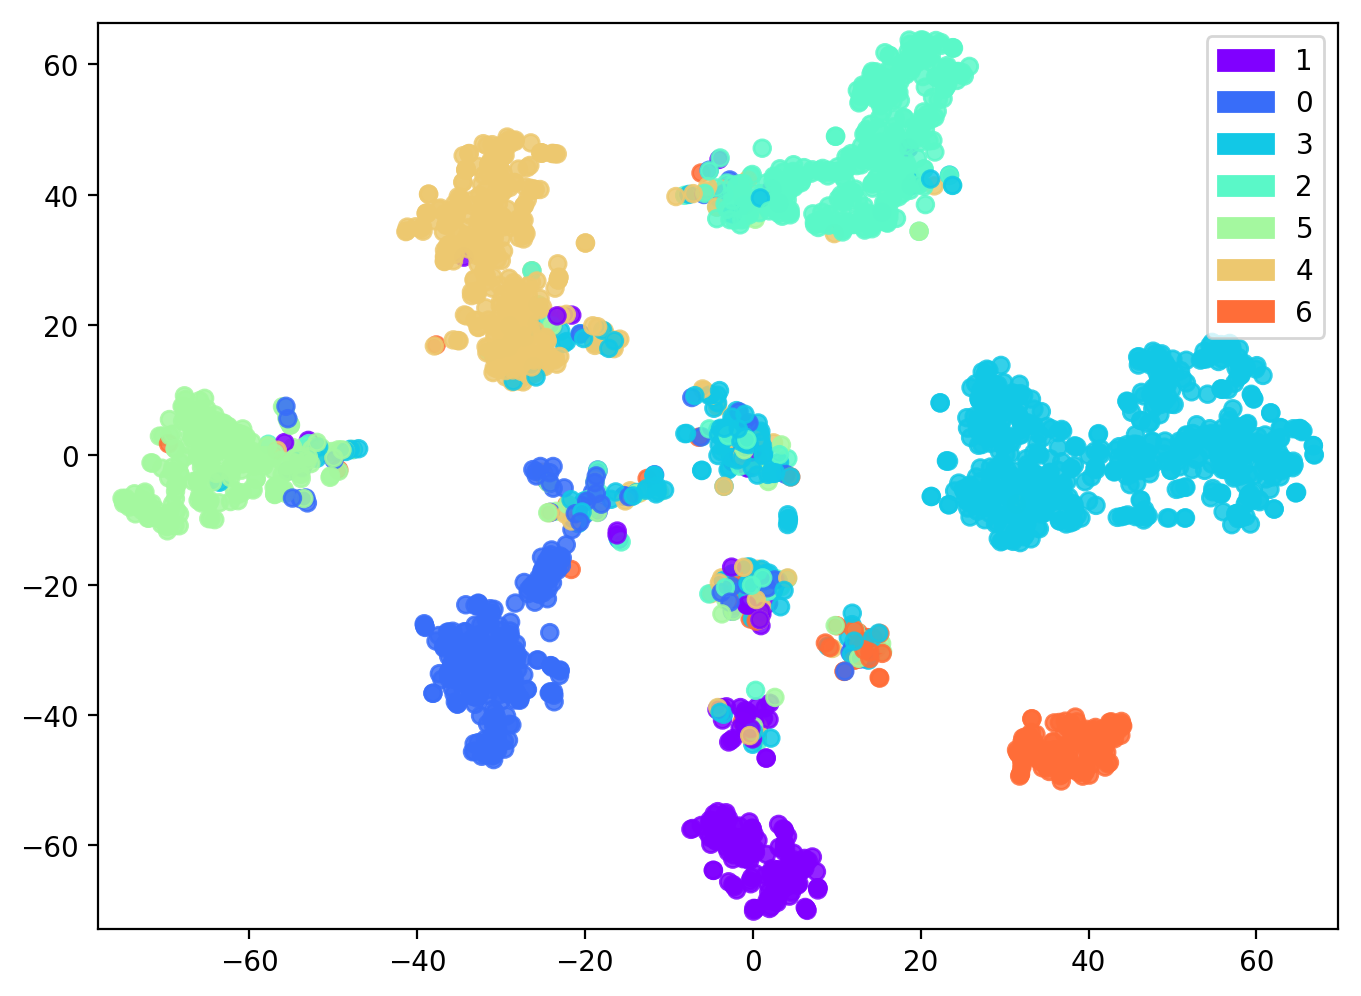

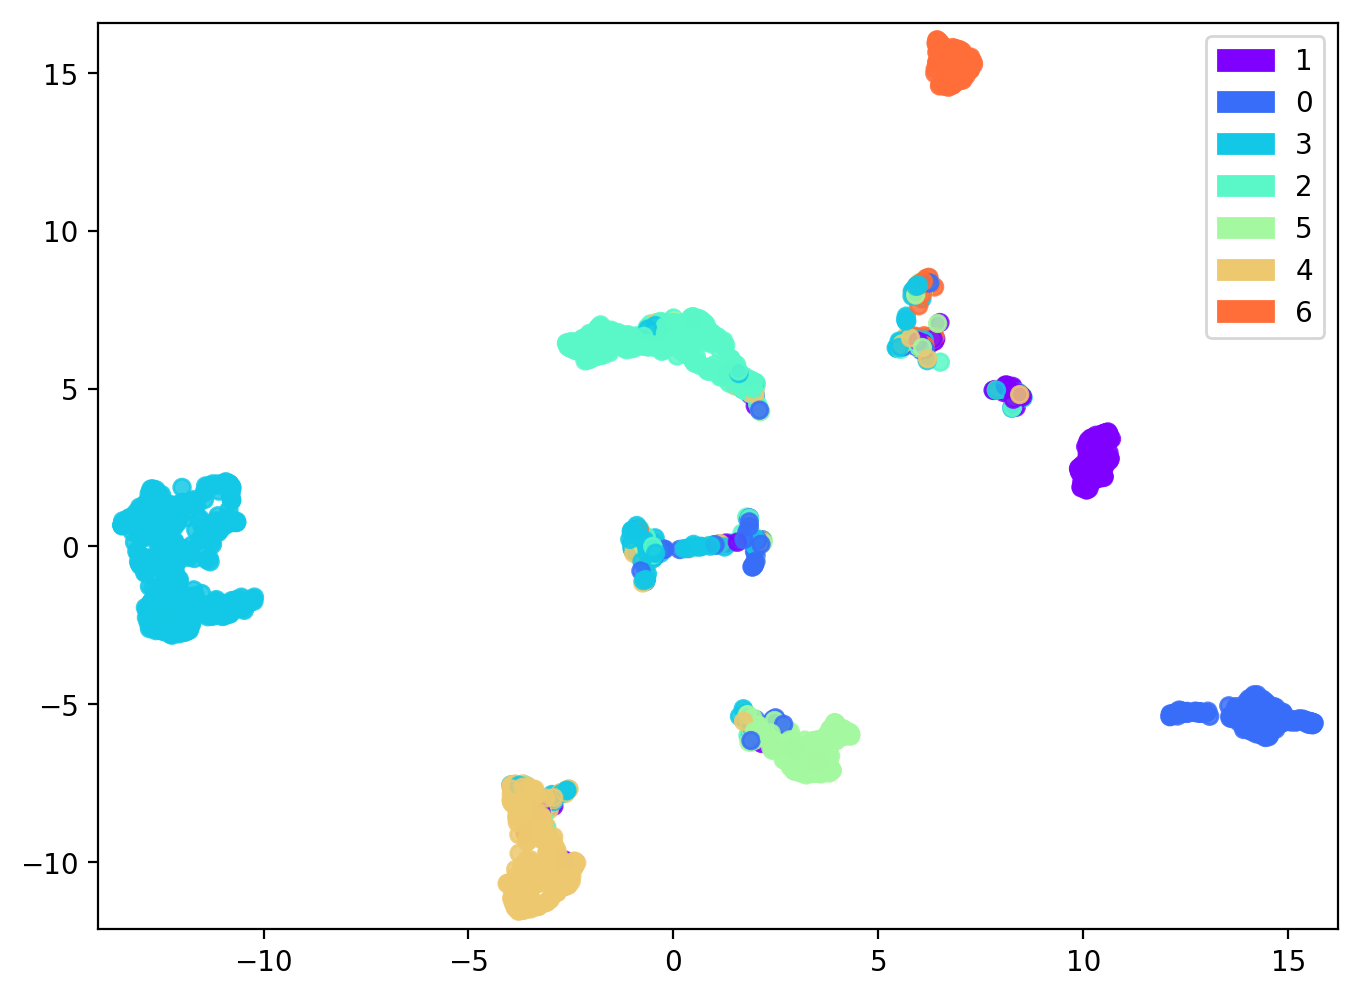

In [7]:
#category_relation = graph.get_list_of_relation("IS")
category_relation = get_category_tuple('data/cora/cora_target.csv', skip_first_line=True)
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

In [ ]:
category_relation = graph.get_list_of_relation("TAKES_ARGUMENTS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

In [ ]:
category_relation = graph.get_list_of_relation("RETURNS")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)

In [ ]:
category_relation = graph.get_list_of_relation("TAKES_ARGTYPE")
operator_embeds, operator_labels = get_category_embeddings(category_relation, embeddings_dict)
tnse_pts = plotting.tsne2D(operator_embeds)
plotting.scatterplot2D_legend(tnse_pts[:,0],tnse_pts[:,1],operator_labels)
umap_pts = plotting.umap2D(operator_embeds)
plotting.scatterplot2D_legend(umap_pts[:,0],umap_pts[:,1],operator_labels)